In [23]:
import os
from sys import path
path.append("../../")
cwd = os.getcwd()

In [24]:
os.chdir("../code")
# Utils
# =====
from Modules.Utils.dt8122_snippets import *
#from Modules.Utils.helpers import *
from Modules.Utils.dataClass_helpers import *
from Modules.Utils.DataLoader import *
from Modules.Utils.dataPlot_helpers import *
from Modules.Utils.miscellaneous_helpers import *

from Modules.Models.ModelWrapper import *
from Modules.Models.Unet import *

# Models
# =====
# ----------------------------
# 0) Device
# ----------------------------
device = (
     torch.device("mps") if getattr(torch.backends, "mps", None) and torch.backends.mps.is_available()
     else torch.device("cuda") if torch.cuda.is_available()
     else torch.device("cpu")
 )
#device = torch.device("cpu")  # Force CPU for compatibility
print("Using device:", device)

# CASE 1
CASE = 3
cropBool = True  # Whether to use the crop source distribution
shufflePairings = False  # Whether to shuffle pairings in the dataset

Using device: mps


## Data and model parameters

In [25]:
# USER INPUT

# =============================== data ===============================
valFrac = 0.10              # Fraction of data to use for validation
seed = 42                   # Random seed for reproducibility
batchSize = 32              # Batch size for training
valBool = 1                 # Whether to use a validation set
splitSeed = 42              # Seed for data splitting
initialShuffleSeed = 12345  # Seed for initial shuffling

# =============================== model ===============================
Tfeats = 11                   # Number of time-feature channels (see `Unet.py`)
modelType = "UNet"            # Currently only "UNet" implemented
lr = 1e-3                     # Adam learning rate
saveThreshold = 0.99          # Save model if loss reduces by this factor
ES = 10                        # Early stopping patience
device = "mps"
model_num  = 1

# Model loading
# ============
load_best = 1
ES_check = [5, 10, 15]
epoch_check = range(100)

## Load data and models

In [26]:
# Load data objects (for plotting only)

data_params = {
    "shufflePairings": shufflePairings,
    "cropBool":        cropBool,
    "valFrac":         valFrac,
    "splitSeed":        splitSeed,
    "initialShuffleSeed": initialShuffleSeed,
    "batchSize":       batchSize,
    "valBool":         valBool,
}


save_dir = path_constructor(data_params, "data_processed")
os.makedirs(save_dir, exist_ok=True)
train_loader = torch.load(os.path.join(save_dir, "train_loader.pt"))
val_loader = torch.load(os.path.join(save_dir, "val_loader.pt"))
test_loader = torch.load(os.path.join(save_dir, "test_loader.pt"))


# Load trained models
model_params = {
    "modelType":     modelType,
    "Tfeats":        Tfeats,         # Number of features in the vector field
    "ES":            ES,             # Early stopping patience for training
    "lr":            lr,             # Learning rate for the optimizer
    "saveThreshold": saveThreshold,  # Threshold for saving the model
    "device":        device          # Device to use for training
}

params = {**data_params, **model_params}
path_intro = path_constructor(params)
save_best_path = os.path.join(path_intro, f"modelNum_{model_num}")
#os.makedirs(save_best_path, exist_ok=True)
trainer_path = os.path.join(save_best_path, "trainer.pt")
trainer = torch.load(trainer_path)

# load best model
loaded, load_path = load_best_checkpoint(
    load_best=load_best,
    save_best_path=save_best_path,
    ES=ES,
    ES_check=ES_check,
    epoch_check=epoch_check,
    trainer=trainer,
    device=device,
    CASE=CASE,
    parse_params_from_path=parse_params_from_path,
)


/var/folders/dn/jj6zl9nx6s541bq88x9x4zvm0000gn/T/ipykernel_78254/1362501901.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_loader = torch.load(os.path.join(save_

[Checkpoint] Loaded best checkpoint: models/shufflePairings_False/cropBool_True/valFrac_0.1/splitSeed_42/initialShuffleSeed_12345/batchSize_32/valBool_1/modelType_UNet/Tfeats_11/ES_10/lr_0.001/saveThreshold_0.99/device_mps/modelNum_1/model_trainedEpochs44.pt
============ Loaded pre-trained model Case 3 = True ============
load_best parameters:
Parameters:
  shufflePairings: False
  cropBool: True
  valFrac: 0.1
  splitSeed: 42
  initialShuffleSeed: 12345
  batchSize: 32
  valBool: 1
  modelType: UNet
  Tfeats: 11
  ES: 10
  lr: 0.001
  saveThreshold: 0.99
  device: mps
  modelNum: 1
  model: trainedEpochs44.pt
----------------------------------------
Parameters:
  shufflePairings: False
  cropBool: True
  valFrac: 0.1
  splitSeed: 42
  initialShuffleSeed: 12345
  batchSize: 32
  valBool: 1
  modelType: UNet
  Tfeats: 11
  ES: 10
  lr: 0.001
  saveThreshold: 0.99
  device: mps
  modelNum: 1


/Users/willa954/Desktop/Git-personal/ProbAI-personal/code/Modules/Models/ModelWrapper.py:628: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path, map_

In [27]:
os.listdir("data_processed")

['.DS_Store', 'shufflePairings_False', 'shufflePairings_True']

### Visualise data

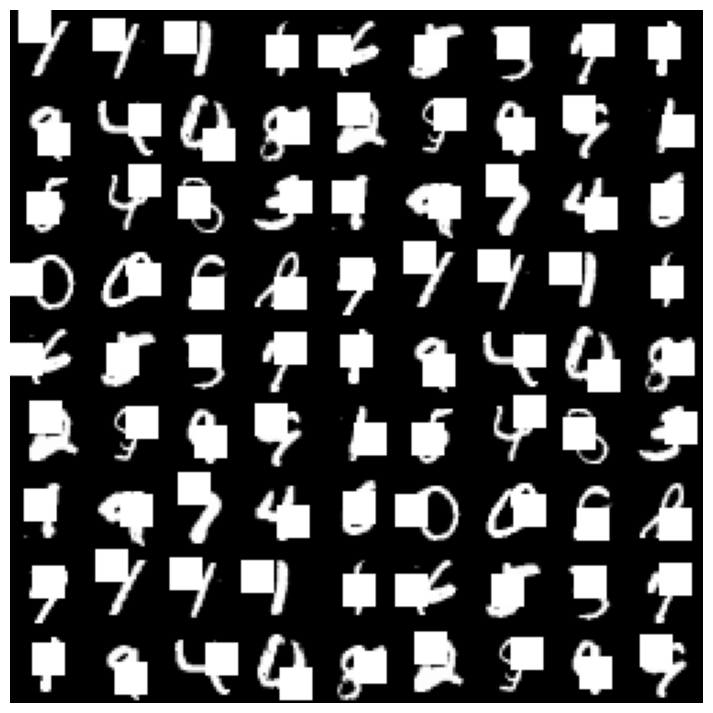

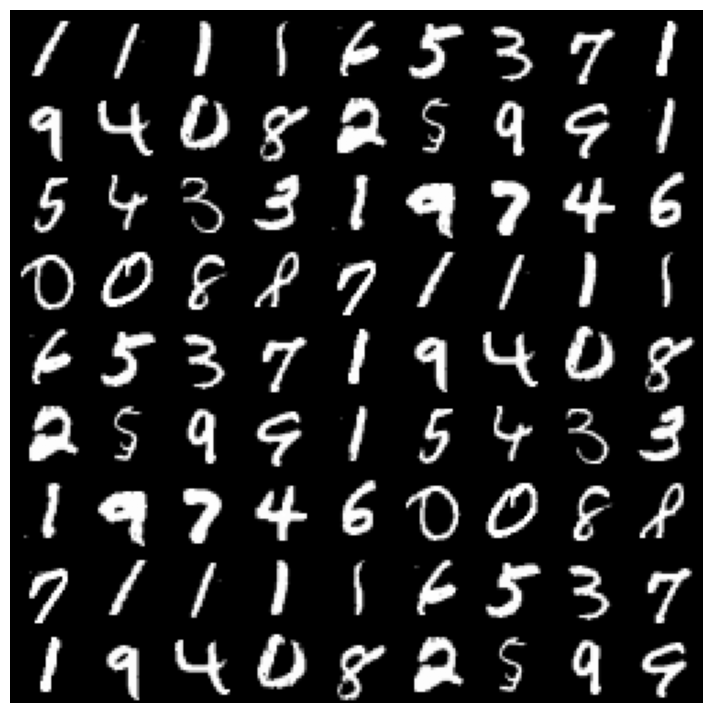

In [28]:
plot_show=True       # display the plots
save_path = None     # do not save the plots

# Suppose you fetched three batches
x0a, x1a = next(iter(train_loader))
x0b, x1b = next(iter(train_loader))
x0c, x1c = next(iter(train_loader))

x1s = [x1a, x1b, x1c]
x0s = [x0a, x0b, x0c]

# collated grid of 81  digits from across the selected batches
show_clean_collated(x0s, num_digits=81, plot_show=plot_show, save_path=save_path) 
show_clean_collated(x1s, num_digits=81, plot_show=plot_show, save_path=save_path) 

### Display training history

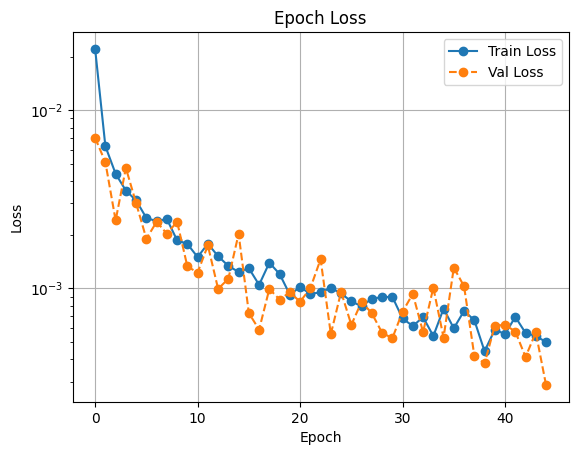

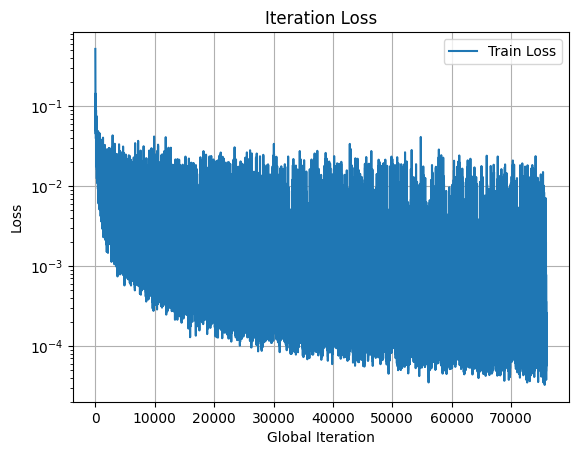

In [29]:
plot_history(show_iter=True,trainer=trainer, logy=1)

## Test results

### Single digit

 ================= Test example index 200  ================= 
--------- x0 ----------


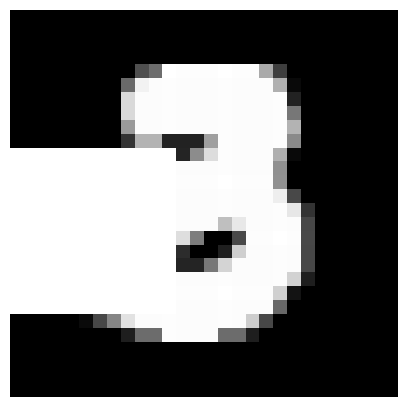

--------- x1 ----------


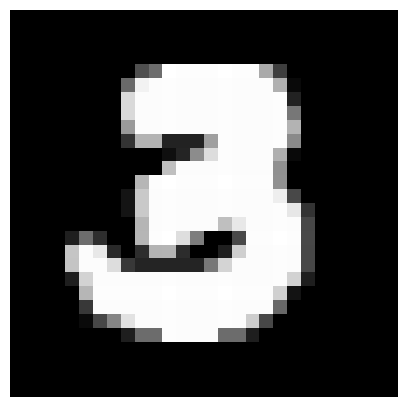

--------- Predicted x1 ----------


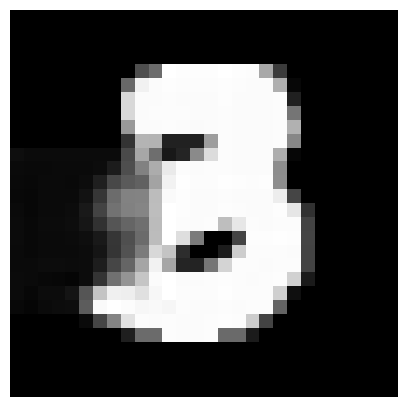

In [30]:
# Individual example
# ============
idx = 200
plot_train_example = 0
plot_val_example = 0
plot_test_example = 1
# ============


def plot_single_helper(loader, idx, label="Training",plot_show=True):
    x0_store = loader.x0
    x1_store = loader.x1
    print(f" ================= {label} example index {idx}  ================= ")
    # TRUE
    print("--------- x0 ----------")
    show_clean_collated([x0_store[idx]], num_digits=batchSize, plot_show=plot_show)
    print("--------- x1 ----------")
    show_clean_collated([x1_store[idx]], num_digits=batchSize, plot_show=plot_show)
    samples =  sample_flow_x(trainer.model, x=x0_store[idx].unsqueeze(0).to(device), steps=10,device=device)
    print("--------- Predicted x1 ----------")
    show_clean_collated([samples[0]], num_digits=batchSize, plot_show=plot_show)



if plot_train_example:
    plot_single_helper(train_loader, idx, label="Training")

if plot_val_example:
    plot_single_helper(val_loader, idx, label="Validation")

if plot_test_example:
    plot_single_helper(test_loader, idx, label="Test")

 ================= Test example num_digits = 100  ================= 
x0 digits


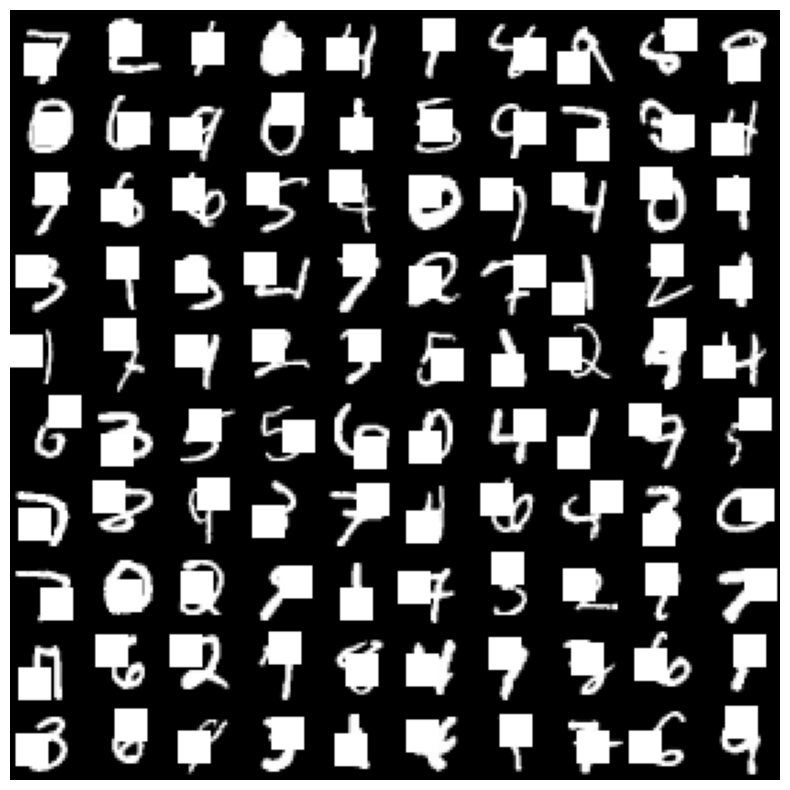

x1 digits


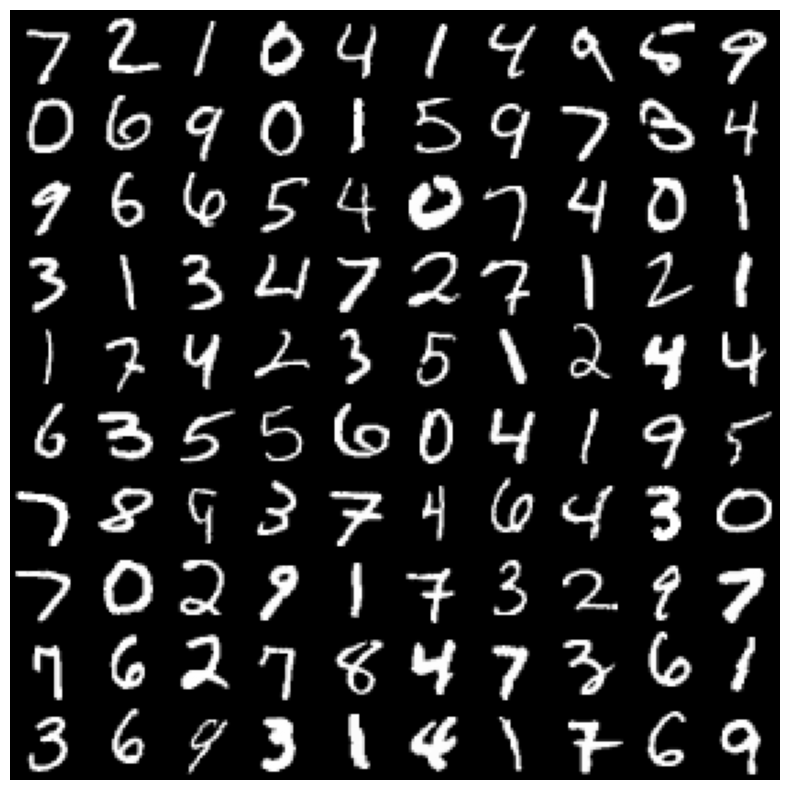

Predicted x1 digits


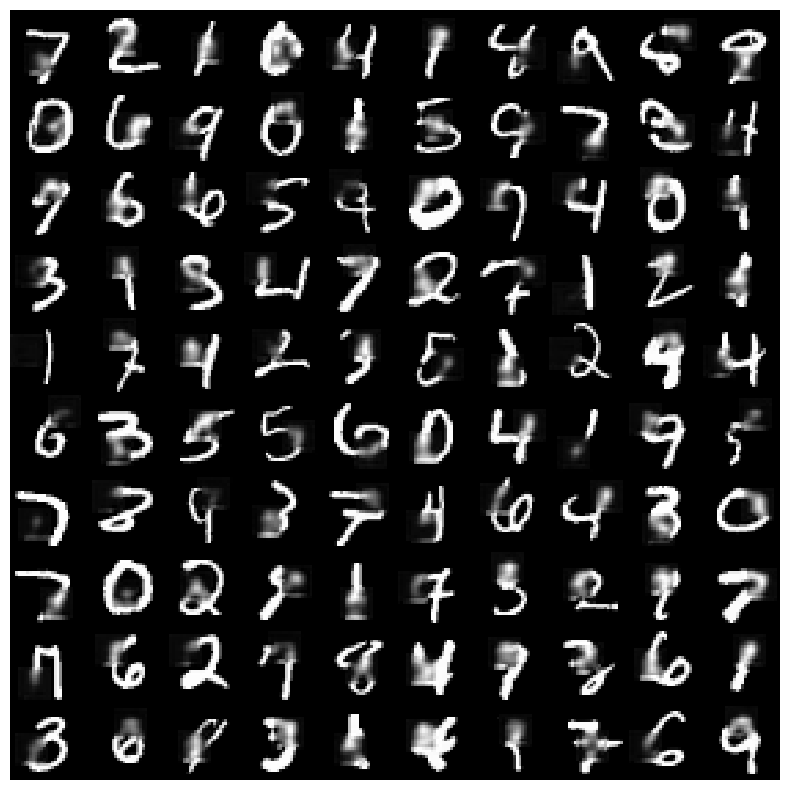

In [31]:
# Fig 1 in report 
# ============
num_digits  = 100
plot_train_100 = 0
plot_val_100 = 0
plot_test_100 = 1
# ============

def plot_100_helper(loader, num_digits=100, label="Training",plot_show=True):
    x0_stacked = loader.x0_stacked
    x1_stacked = loader.x1_stacked
    fig1_x0_path = os.path.join(save_best_path , f"fig1_{label}_x0.png")
    fig1_x1_path = os.path.join(save_best_path , f"fig1_{label}_x1.png")
    fig1_name = f"fig1_trainedEpochs{trainer.epoch}_{label}data.png"
    fig1_path = os.path.join(save_best_path , fig1_name)
    #fig1_clean_name = f"fig1_clean_{label}data.png"
    #fig1_clean_path = os.path.join(save_best_path , fig1_clean_name)

    print(f" ================= {label} example num_digits = {num_digits}  ================= ")
    
    print("x0 digits")
    show_clean_collated([x0_stacked[:num_digits]],
                         num_digits=num_digits,
                        save_path = fig1_x0_path,
                        plot_show=plot_show) # collated grid of 100 clean digits from across the selected batches

    print("x1 digits")
    show_clean_collated([x1_stacked[:num_digits]],
                         num_digits=num_digits,
                        save_path = fig1_x1_path,
                        plot_show=plot_show) # collated grid of 100 clean digits from across the selected batches
    
    
    print("Predicted x1 digits")
    samples =  sample_flow_x(trainer.model, x=x0_stacked[:num_digits].to(device), steps=10,device=device)
    show_collated(samples, save_path = fig1_path, plot_show=plot_show)

if plot_train_100:
    plot_100_helper(train_loader, num_digits=100, label="Training",plot_show=True)

if plot_val_100:
    plot_100_helper(val_loader, num_digits=100, label="Validation",plot_show=True)

if plot_test_100:
    plot_100_helper(test_loader, num_digits=100, label="Test",plot_show=True)


### Generated digits with time (test set)

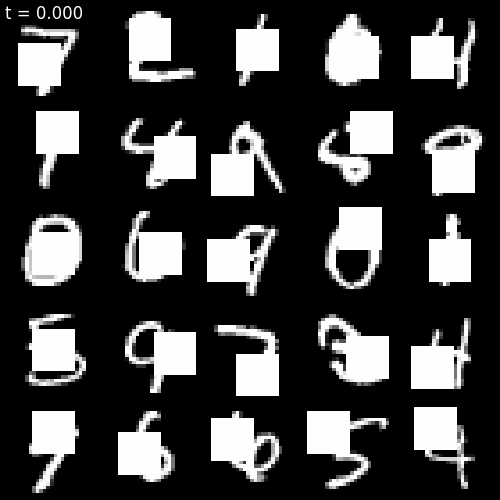

In [32]:
num_digits  = 25
x0_test = test_loader.x0_stacked
trajs = sample_flow_x_all(trainer.model, x=x0_test[:num_digits].to(device), steps=10, device=device)
gif_name = f"trajectory_trainedEpochs{trainer.epoch}.gif"
gif_path = os.path.join(save_best_path , gif_name)
save_trajectory_gif(
    trajs,
    path=gif_path,
    fps=2)
#show_trajectory_collated(trajs, nrow=None, every=1, title=None)

Image(gif_path)  # Display the saved GIF in the notebook


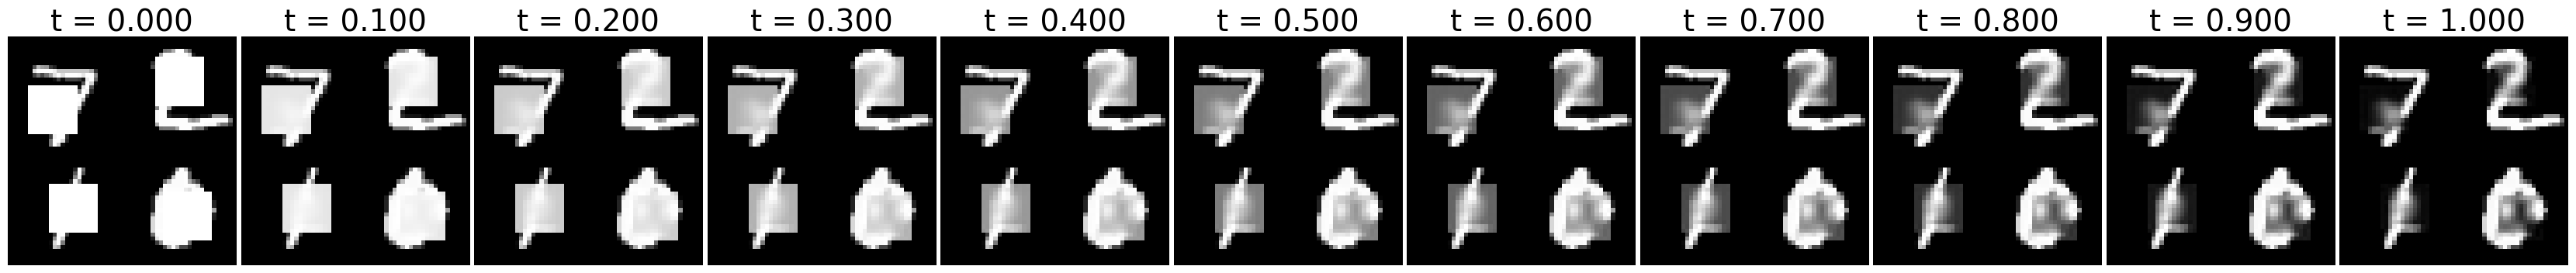

'models/shufflePairings_False/cropBool_True/valFrac_0.1/splitSeed_42/initialShuffleSeed_12345/batchSize_32/valBool_1/modelType_UNet/Tfeats_11/ES_10/lr_0.001/saveThreshold_0.99/device_mps/modelNum_1/fig2_trainedEpochs44.png'

In [33]:
num_digits  = 4
trajs = sample_flow_x_all(trainer.model, x=x0_test[:num_digits].to(device), steps=10, device=device)
# save all frames as a single PNG strip, sampling every 2 time-steps
fig2_name = f"fig2_trainedEpochs{trainer.epoch}.png"
fig2_path = os.path.join(save_best_path , fig2_name)
save_trajectory_strip(trajs, path=fig2_path, nrow=2, every=1)
